In [2]:
import pandas as pd # 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Historical probability of success by indication from BIO 2011–2020 report
data = [
    {"Indication": "Oncology", "Phase_I_to_II": 0.638, "Phase_II_to_III": 0.247, "Phase_III_to_Approval": 0.407},
    {"Indication": "Neurology", "Phase_I_to_II": 0.706, "Phase_II_to_III": 0.324, "Phase_III_to_Approval": 0.588},
    {"Indication": "Cardiovascular", "Phase_I_to_II": 0.758, "Phase_II_to_III": 0.365, "Phase_III_to_Approval": 0.674},
    {"Indication": "Infectious Disease", "Phase_I_to_II": 0.775, "Phase_II_to_III": 0.463, "Phase_III_to_Approval": 0.746},
    {"Indication": "Endocrine/Metabolic", "Phase_I_to_II": 0.786, "Phase_II_to_III": 0.382, "Phase_III_to_Approval": 0.698},
]

# Create a DataFrame
df_pos = pd.DataFrame(data)

# Add a calculated column for overall Phase I → Approval probability
df_pos["Overall_Phase1_to_Approval"] = (
    df_pos["Phase_I_to_II"] * df_pos["Phase_II_to_III"] * df_pos["Phase_III_to_Approval"]
)

df_pos.round(3)

,Indication,Phase_I_to_II,Phase_II_to_III,Phase_III_to_Approval,Overall_Phase1_to_Approval
0,Oncology,0.638,0.247,0.407,0.064
1,Neurology,0.706,0.324,0.588,0.135
2,Cardiovascular,0.758,0.365,0.674,0.186
3,Infectious Disease,0.775,0.463,0.746,0.268
4,Endocrine/Metabolic,0.786,0.382,0.698,0.210


In [4]:
# Display the full table of probabilities
df_pos.round(3)

,Indication,Phase_I_to_II,Phase_II_to_III,Phase_III_to_Approval,Overall_Phase1_to_Approval
0,Oncology,0.638,0.247,0.407,0.064
1,Neurology,0.706,0.324,0.588,0.135
2,Cardiovascular,0.758,0.365,0.674,0.186
3,Infectious Disease,0.775,0.463,0.746,0.268
4,Endocrine/Metabolic,0.786,0.382,0.698,0.210


In [5]:
def estimate_pos(indication):
    row = df_pos[df_pos["Indication"].str.lower() == indication.lower()]
    if row.empty:
        print("Indication not found.")
        return None
    else:
        p1 = row["Phase_I_to_II"].values[0]
        p2 = row["Phase_II_to_III"].values[0]
        p3 = row["Phase_III_to_Approval"].values[0]
        overall = row["Overall_Phase1_to_Approval"].values[0]

        print(f"📊 Estimated Clinical Success Rates for '{indication}':")
        print(f" - Phase I → II: {p1*100:.1f}%")
        print(f" - Phase II → III: {p2*100:.1f}%")
        print(f" - Phase III → Approval: {p3*100:.1f}%")
        print(f"✅ Overall Phase I → Approval: {overall*100:.2f}%")
        return overall

In [6]:
# Type an indication like: Oncology, Neurology, Cardiovascular
estimate_pos("Neurology")

📊 Estimated Clinical Success Rates for 'Neurology':
 - Phase I → II: 70.6%
 - Phase II → III: 32.4%
 - Phase III → Approval: 58.8%
✅ Overall Phase I → Approval: 13.45%


np.float64(0.13450147199999998)

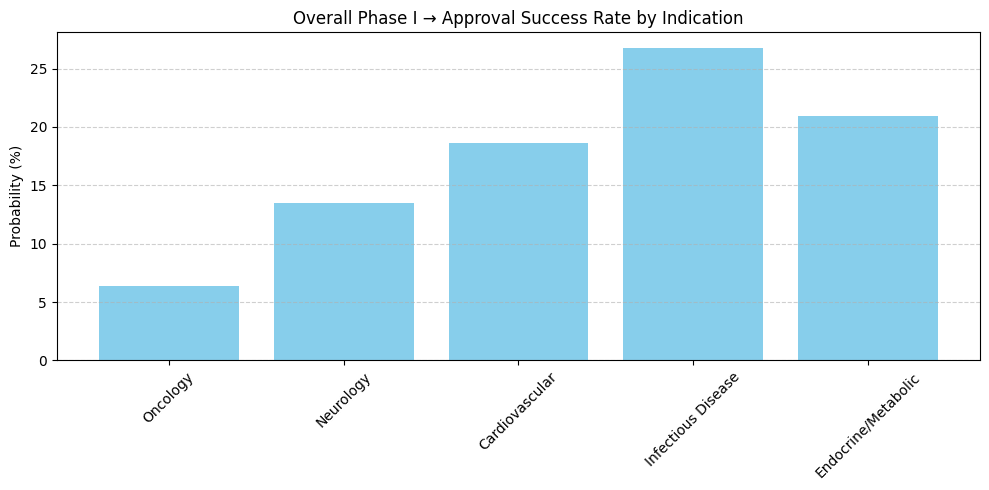

In [7]:
# Plot overall success rates by indication
plt.figure(figsize=(10,5))
plt.bar(df_pos["Indication"], df_pos["Overall_Phase1_to_Approval"] * 100, color='skyblue')
plt.title("Overall Phase I → Approval Success Rate by Indication")
plt.ylabel("Probability (%)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [8]:
# Use requests or ctgov API to search drug names or NCT numbers
import requests

def search_clinical_trials(search_term, max_results=5):
    """
    Search ClinicalTrials.gov for a given drug or condition keyword.
    Returns a summary of matching clinical trials.
    """
    base_url = "https://clinicaltrials.gov/api/v2/studies"
    params = {
        "query.term": search_term,
        "pageSize": max_results
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()
        data = response.json()

        results = []
        studies = data.get("studies", [])
        for study in studies:
            title = study.get("protocolSection", {}).get("identificationModule", {}).get("briefTitle", "N/A")
            nct_id = study.get("protocolSection", {}).get("identificationModule", {}).get("nctId", "N/A")
            phase = study.get("protocolSection", {}).get("designModule", {}).get("phaseList", {}).get("phases", ["N/A"])
            status = study.get("protocolSection", {}).get("statusModule", {}).get("overallStatus", "N/A")
            conditions = study.get("protocolSection", {}).get("conditionsModule", {}).get("conditions", ["N/A"])

            results.append({
                "NCT ID": nct_id,
                "Title": title,
                "Phase": ", ".join(phase),
                "Status": status,
                "Conditions": ", ".join(conditions)
            })

        return results

    except Exception as e:
        return f"Error retrieving data: {e}"


In [9]:
# search drug names or NCT numbers by tying the drug name
results = search_clinical_trials("ALS", max_results=5)

for i, r in enumerate(results, 1):
    print(f"🔹 Trial {i}:")
    for k, v in r.items():
        print(f"  {k}: {v}")
    print("-" * 40)

🔹 Trial 1:
  NCT ID: NCT04261829
  Title: AFT: Introduction of a Full Breast Reconstructive Method
  Phase: N/A
  Status: RECRUITING
  Conditions: Breast Cancer, Reconstructive Surgery, Breast Reconstruction
----------------------------------------
🔹 Trial 2:
  NCT ID: NCT04307576
  Title: A Treatment Study Protocol for Participants 0-45 Years With Acute Lymphoblastic Leukaemia
  Phase: N/A
  Status: RECRUITING
  Conditions: Leukemia, Acute Lymphoblastic
----------------------------------------
🔹 Trial 3:
  NCT ID: NCT00928876
  Title: Interleukin-1 Receptor Antagonist and Insulin Sensitivity
  Phase: N/A
  Status: UNKNOWN
  Conditions: Diabetes Mellitus, Type 2, Insulin Resistance
----------------------------------------
🔹 Trial 4:
  NCT ID: NCT00355576
  Title: Combination Therapy Selection Trial in Amyotrophic Lateral Sclerosis
  Phase: N/A
  Status: COMPLETED
  Conditions: Amyotrophic Lateral Sclerosis
----------------------------------------
🔹 Trial 5:
  NCT ID: NCT05336760
  Titl

Markdown 
# Drug Development Probability of Success Estimator and Clinical Trial Lookup Tool

This Jupyter Notebook provides two main features:

- **Probability of Success (PoS) Model:**
  Estimates drug development success rates by therapeutic indication and clinical trial phase, based on BIO 2011–2020 industry data.

- **Clinical Trial Lookup Tool:**
  Uses the ClinicalTrials.gov API to search and display ongoing or completed clinical trials by drug or condition name.

---

## Purpose

Designed as a **biotech due diligence tool** for investment analysts, researchers, and life sciences professionals who want to:

- Evaluate pipeline risk and potential
- Access live clinical trial data
- Combine data-driven modeling with real-world trial insights

---

## How to Use

1. Open the notebook `drug_dev_pos_and_trial_lookup.ipynb` in Jupyter Notebook or JupyterLab.
2. Run cells sequentially, starting from the top.
3. Use the `estimate_pos()` function to get success probabilities by indication.
4. Use the `search_clinical_trials()` function to find trials by keyword.

---

## Requirements

- Python 3.x
- Packages: `pandas`, `numpy`, `matplotlib`, `requests`, `jupyter`

---

## Author

Yi-Kai
2025-07-16